In [2]:
] add DelimitedFiles

   Resolving package versions...
  No Changes to `/workspaces/phys2200-lectures-kmyrmres/Project.toml`
  No Changes to `/workspaces/phys2200-lectures-kmyrmres/Manifest.toml`
Precompiling project...
    639.9 ms  ✓ LaTeXStrings
    648.4 ms  ✓ Reexport
   1009.3 ms  ✓ Statistics
    908.7 ms  ✓ DelimitedFiles
   4051.0 ms  ✓ MacroTools
   3899.0 ms  ✓ FixedPointNumbers
   1695.0 ms  ✓ ColorTypes
   1085.3 ms  ✓ ColorTypes → StyledStringsExt
   8346.6 ms  ✓ Colors
  18466.2 ms  ✓ PyCall
   4082.2 ms  ✓ PyPlot
  11 dependencies successfully precompiled in 29 seconds. 42 already precompiled.


In [1]:
using DelimitedFiles
using PyPlot

In [2]:
url = "https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"

"https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"

In [3]:
 obsevations = download(url)

"/tmp/jl_IBuFkvkF2N"

In [4]:
dat = readdlm(obsevations, comments=true, comment_char='#')

25×2 Matrix{Float64}:
  0.1    11.1
  0.24   19.9
  0.38   25.4
  0.52   28.8
  0.66   31.9
  0.8    34.2
  0.94   36.3
  1.08   38.9
  1.22   41.0
  1.36   42.8
  1.5    44.4
  1.65   46.0
  1.79   46.9
  1.93   48.7
  3.26   59.0
  3.53   61.1
  3.8    62.9
  4.07   64.3
  4.34   65.6
  4.61   67.3
 15.0   106.5
 25.0   130.0
 34.0   145.0
 53.0   175.0
 62.0   185.0

In [5]:
time = dat[:, 1]     # time in ms

25-element Vector{Float64}:
  0.1
  0.24
  0.38
  0.52
  0.66
  0.8
  0.94
  1.08
  1.22
  1.36
  1.5
  1.65
  1.79
  1.93
  3.26
  3.53
  3.8
  4.07
  4.34
  4.61
 15.0
 25.0
 34.0
 53.0
 62.0

In [6]:
radius = dat[:, 2]   # radius in m

25-element Vector{Float64}:
  11.1
  19.9
  25.4
  28.8
  31.9
  34.2
  36.3
  38.9
  41.0
  42.8
  44.4
  46.0
  46.9
  48.7
  59.0
  61.1
  62.9
  64.3
  65.6
  67.3
 106.5
 130.0
 145.0
 175.0
 185.0

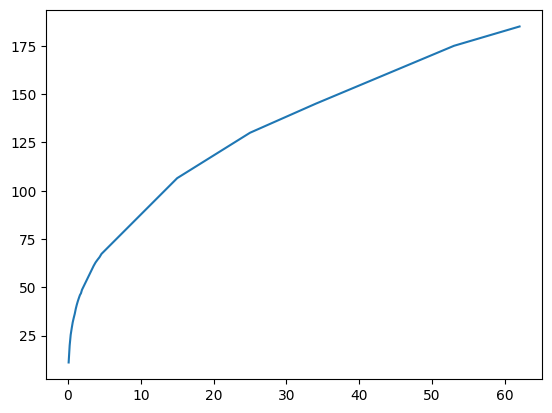

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7d93c6a99910>

In [7]:
plot(time, radius)

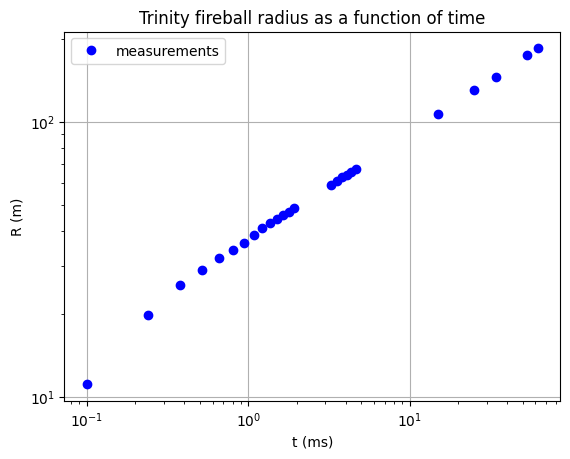

In [8]:
loglog(time, radius, "bo", label="measurements")
grid(true)
xlabel("t (ms)")
ylabel("R (m)")
legend()
title("Trinity fireball radius as a function of time");

In [15]:
nm = length(time[3:end])

23

In [16]:
tlogbar = sum(log.(time[3:end]))/nm

1.1363353005466241

In [19]:
rlogbar = sum(log.(radius[3:end]))/nm

4.063213128797501

In [20]:
alphalogbar = rlogbar - 2/5*tlogbar

3.608679008578851

In [22]:
const scale = 1.0e6
const rho = 1.2
const tnt = 4.185e12

4.185e12

In [23]:
alpha = exp(alphalogbar)

36.917253215202955

In [25]:
println("α = $(round(alpha, sigdigits=4))")

α = 36.92


In [26]:
energyJ = scale * alpha^5 * rho 

8.228641619270988e13

In [27]:
println("E = $(round(energyJ, sigdigits=3)) Joules")

E = 8.23e13 Joules


In [28]:
energyT = energyJ / tnt

19.662226091447998

In [30]:
println("E = $(round(energyT, sigdigits=3)) kilotons of TNT")

E = 19.7 kilotons of TNT


In [31]:
rad(t, alpha) = alpha * t^(2/5)

rad (generic function with 1 method)

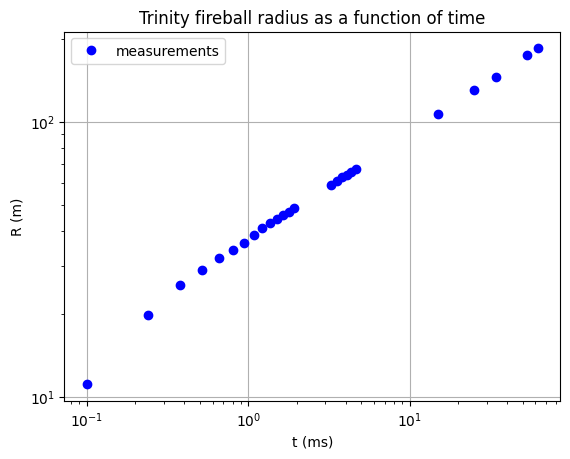

In [32]:
loglog(time, radius, "bo", label="measurements")
grid(true)
xlabel("t (ms)")
ylabel("R (m)")
legend()
title("Trinity fireball radius as a function of time");